In [21]:
import Modules.SQcircuit_extensions as sq_ext
import Modules.figures as figs
import SQcircuit as sq
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import importlib

%matplotlib ipympl
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Palatino"],
# })
plt.rcParams['text.usetex'] = False
importlib.reload(sq_ext)
importlib.reload(sq)
importlib.reload(figs)
np.set_printoptions(linewidth=300, formatter={'float': '{:.12f}'.format})
# np.set_printoptions(linewidth=200, formatter={'float': '{:.1e}'.format})

In [77]:
nH = 1e-9
fF = 1e-15
GHz = 1e9

In [78]:
h    = 6.626e-34
GHz = 1e9
e0   = 1.602e-19
Φ_0 = h/(2*e0)

In [85]:
# Circuit parameters
C=10
CJ=6
Csh=10
Lq=25
Lr=10
Δ=0.1

EJ = 10
l = Lq*(Lq+4*Lr) - 4*Δ**2

In [86]:
Cf = C/2 + Csh + CJ
Lf = l/(Lq+4*Lr)

C_f = Cf * fF
L_f = Lf * nH
E_J = EJ * GHz

Lres = l/(Lq)
Cres = C/2
L_res = Lres * nH
C_res = Cres * fF

In [87]:
Lf

24.999384615384617

In [88]:
(2 * Δ / l)**-1

8124.799999999999

In [7]:
E_L_r = (Φ_0/(2*np.pi))**2/L_res / h
E_L_r / GHz

2.5153823766259946

In [8]:
E_C_r = e0**2 / (2*C_res) / h
E_C_r / GHz

3.8732327195894953

In [9]:
ω_r = 1/np.sqrt(L_res*C_res) / 2 / np.pi / GHz
ω_r

8.828436474677309

In [10]:
E_L_f = (Φ_0/(2*np.pi))**2/L_f / h/ GHz
E_L_f 

6.539994179227587

In [11]:
E_C_f = e0**2 / (2*C_f) / h / GHz
E_C_f 

0.9221982665689276

In [12]:
ω01_res_lim = 1/np.sqrt(C_f*L_f) /2/np.pi/GHz
ω01_res_lim

6.946176672359871

In [13]:
EJ_values = np.geomspace(1e-1,100,50)
ω01_vs_EJ = np.zeros(len(EJ_values))
ω12_vs_EJ = np.zeros(len(EJ_values))
ω01_cR_lim_vs_EJ = np.zeros(len(EJ_values))
ω12_cR_lim_vs_EJ = np.zeros(len(EJ_values))


for i, EJ in enumerate(EJ_values):
    V =  lambda φ: E_L_f*φ**2/2 - EJ*GHz*np.cos(φ+np.pi)
    φ_min = sp.optimize.minimize_scalar(V).x
    Φ_min= (Φ_0 / (2 * np.pi)) * φ_min / np.sqrt(sq.hbar) 
    
    fluxonium_vs_EJ = sq_ext.sq_fluxonium( EJ=EJ , C_F_eff=Cf, L_F_eff=Lf)  
    fluxonium_vs_EJ.diag(3) 
    ω01_vs_EJ[i] = fluxonium_vs_EJ.efreqs[1]-fluxonium_vs_EJ.efreqs[0]
    ω12_vs_EJ[i] = fluxonium_vs_EJ.efreqs[2]-fluxonium_vs_EJ.efreqs[1]
    L_f_CR = (Φ_0/2/np.pi)**2 / (EJ*GHz * h)
    ω12_cR_lim_vs_EJ[i]  = 1/np.sqrt(C_f*L_f_CR) /2/np.pi/GHz

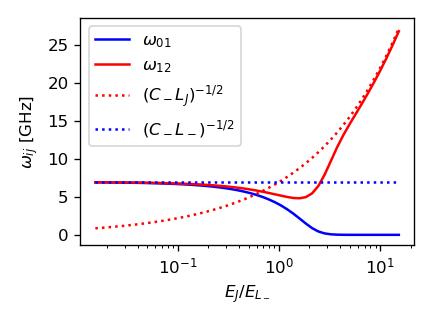

In [14]:
fig, ax = plt.subplots(figsize=np.array([4,3])*0.9, dpi=120)
ax.plot(EJ_values/E_L_f, ω01_vs_EJ, 'b', label=r'$\omega_{01}$')
ax.plot(EJ_values/E_L_f, ω12_vs_EJ, 'r', label=r'$\omega_{12}$')
ax.plot(EJ_values/E_L_f, ω12_cR_lim_vs_EJ, ':r', label=r'$(C_-L_J)^{-1/2}$')
ax.plot(EJ_values/E_L_f, ω01_res_lim*np.ones(len(EJ_values)), ':b', label=r'$(C_-L_-)^{-1/2}$')
# ax.plot(EJ_values, ω01_cR_lim_vs_EJ, ':k')

ax.set_xscale('log')
ax.legend()
ax.set_xlabel('$E_J/E_{L_-}$')
ax.set_ylabel('$\omega_{ij}$ [GHz]')
fig.tight_layout()
fig.show()
figs.export('fluxonium_gap_analytical_vs_numerical.pdf', fig)

# plt.close('all')

In [167]:
n_plot          = 100
EJ_values       = np.geomspace(1,15,n_plot)

CJ_values       =  np.linspace(1,6, n_plot)
Csh_values      =  np.linspace(3,10, n_plot)
Lq_values       = [10, 30, 50] 
Δ_values        = [1e-2, 1e-1, 0.5]
Lr_C_values     = [(5,5), (7.5, 12.5), (10, 30)]


In [168]:
def gap_vs_EJ(EJ, Lq_values, Δ_values, CJ_values, Csh_values, Lr_C_values):    
    
    ω01_vs_params   = np.zeros([len(CJ_values), len(Lq_values), len(Lr_C_values), len(Δ_values) ])
    ω12_vs_params   = np.zeros([len(CJ_values), len(Lq_values), len(Lr_C_values), len(Δ_values) ])
    ω01_q_vs_params = np.zeros([len(CJ_values), len(Lq_values), len(Lr_C_values), len(Δ_values) ])
    ω12_q_vs_params = np.zeros([len(CJ_values), len(Lq_values), len(Lr_C_values), len(Δ_values) ])
    ω_r_vs_params   = np.zeros([len(CJ_values), len(Lq_values), len(Lr_C_values), len(Δ_values) ])
    g_vs_params     = np.zeros([len(CJ_values), len(Lq_values), len(Lr_C_values), len(Δ_values) ])
    EC_F_values   = np.zeros([len(CJ_values), len(Lr_C_values)]) 
    EC_R_values   = np.zeros([len(CJ_values), len(Lr_C_values)]) 
    EL_F_values = np.zeros([len(Lq_values), len(Lr_C_values), len(Δ_values) ])
    EL_R_values = np.zeros([len(Lq_values), len(Lr_C_values), len(Δ_values) ])
    
    
    for j, (CJ, Csh ) in enumerate(zip(CJ_values, Csh_values)):      
        for k, Lq  in enumerate(Lq_values):
            for l, (Lr, C) in enumerate(Lr_C_values):
                
                C_F_eff = C/2 + Csh + CJ
                C_R_eff = C/2
                
                if k==0:
                    EC_F_values[j, l] = e0**2 / (2*C_F_eff*fF) / h / GHz
                    EC_R_values[j, l] = e0**2 / (2*C_R_eff*fF) / h / GHz
                
                for m, Δ in enumerate(Δ_values):
                    l_ind = (Lq*(Lq+4*Lr) - 4*Δ**2) 
                    L_F_eff = l_ind / (Lq+4*Lr)
                    L_R_eff = l_ind/ Lq
                    if j==0:
                        EL_F_values[k,l,m] = (Φ_0/(2*np.pi))**2/(L_F_eff*nH) / h/ GHz
                        EL_R_values[k,l,m] = (Φ_0/(2*np.pi))**2/(L_R_eff*nH) / h/ GHz
                    
                    fluxonium = sq_ext.sq_fluxonium(EJ=EJ, C_F_eff=C_F_eff, L_F_eff=L_F_eff)  
                    fluxonium.diag(3) 
                    ω01_vs_params[j,k,l,m] = fluxonium.efreqs[1]-fluxonium.efreqs[0]
                    ω12_vs_params[j,k,l,m] = fluxonium.efreqs[2]-fluxonium.efreqs[1]
                    
                    resonator = sq_ext.sq_resonator(L_R_eff=L_R_eff, C_R_eff=C_R_eff)
                    resonator.diag(2) 
                    ω_r_vs_params[j,k,l,m] = resonator.efreqs[1]-resonator.efreqs[0]
                    
                    E_q = sq_ext.diag(sq_ext.hamiltonian_qubit(fluxonium=fluxonium, resonator=resonator, Δ=Δ))[0]
                    ω01_q_vs_params[j,k,l,m] = E_q[1]-E_q[0]
                    ω12_q_vs_params[j,k,l,m] = E_q[2]-E_q[1]
                    
                    Φf = fluxonium.flux_op(0, basis='eig')[0,1]
                    Φr = resonator.flux_op(0, basis='eig')[0,1]
                    g_vs_params[j,k,l,m] =  2 * Δ / (l_ind  * nH) * Φf * Φr / 2 / np.pi / GHz
                    
    return ω01_vs_params, ω12_vs_params, ω01_q_vs_params, ω12_q_vs_params, ω_r_vs_params, g_vs_params, EC_F_values, EC_R_values, EL_F_values, EL_R_values
    

In [169]:
from joblib import Parallel, delayed, cpu_count

Data = Parallel(n_jobs=min(cpu_count(), n_plot))(delayed(gap_vs_EJ)(EJ, Lq_values, Δ_values, CJ_values, Csh_values, Lr_C_values) for EJ in EJ_values)
ω01_vs_params   = []
ω12_vs_params   = []
ω01_q_vs_params = []
ω12_q_vs_params = []
ω_r_vs_params   = []
g_vs_params     = []

for i, (Data_i) in enumerate(zip(Data)):
    ω01, ω12, ω01_q, ω12_q, ω_r, g, EC_F, EC_R, EL_F, EL_R = Data_i[0]
    ω01_vs_params  .append( ω01   )
    ω12_vs_params  .append( ω12   )
    ω01_q_vs_params.append( ω01_q )
    ω12_q_vs_params.append( ω12_q )
    ω_r_vs_params  .append( ω_r   )
    g_vs_params    .append( g     )
    EC_F_values = EC_F
    EC_R_values = EC_R
    EL_F_values = EL_F
    EL_R_values = EL_R
ω01_vs_params  = np.array(ω01_vs_params  )
ω12_vs_params  = np.array(ω12_vs_params  )
ω01_q_vs_params= np.array(ω01_q_vs_params)
ω12_q_vs_params= np.array(ω12_q_vs_params)
ω_r_vs_params  = np.array(ω_r_vs_params  )
g_vs_params    = np.array(g_vs_params    )

In [ ]:
# for i in EJ_values
# for j, (CJ, Csh ) in enumerate(zip(CJ_values, Csh_values)):      
# for k, Lq  in enumerate(Lq_values):
# for l, (Lr, C) in enumerate(Lr_C_values):
# for m, Δ in enumerate(Δ_values):
# ω01_vs_params[i,j,k,l,m]
# EL_F_values[k,l,m]
# EC_F_values[j, l]
# ω01_vs_params, ω12_vs_params, ω01_q_vs_params, ω12_q_vs_params, ω_r_vs_params, g_vs_params, EC_F_values, EC_R_values, EL_F_values, EL_R_values

In [146]:
ω_r_vs_params[0,0,:,:,0]

array([[18.377642099159, 10.065847453822, 5.811519155934],
       [14.235252766377, 8.218726834012, 4.911628644195],
       [12.030983525993, 7.117625790053, 4.331649088260]])

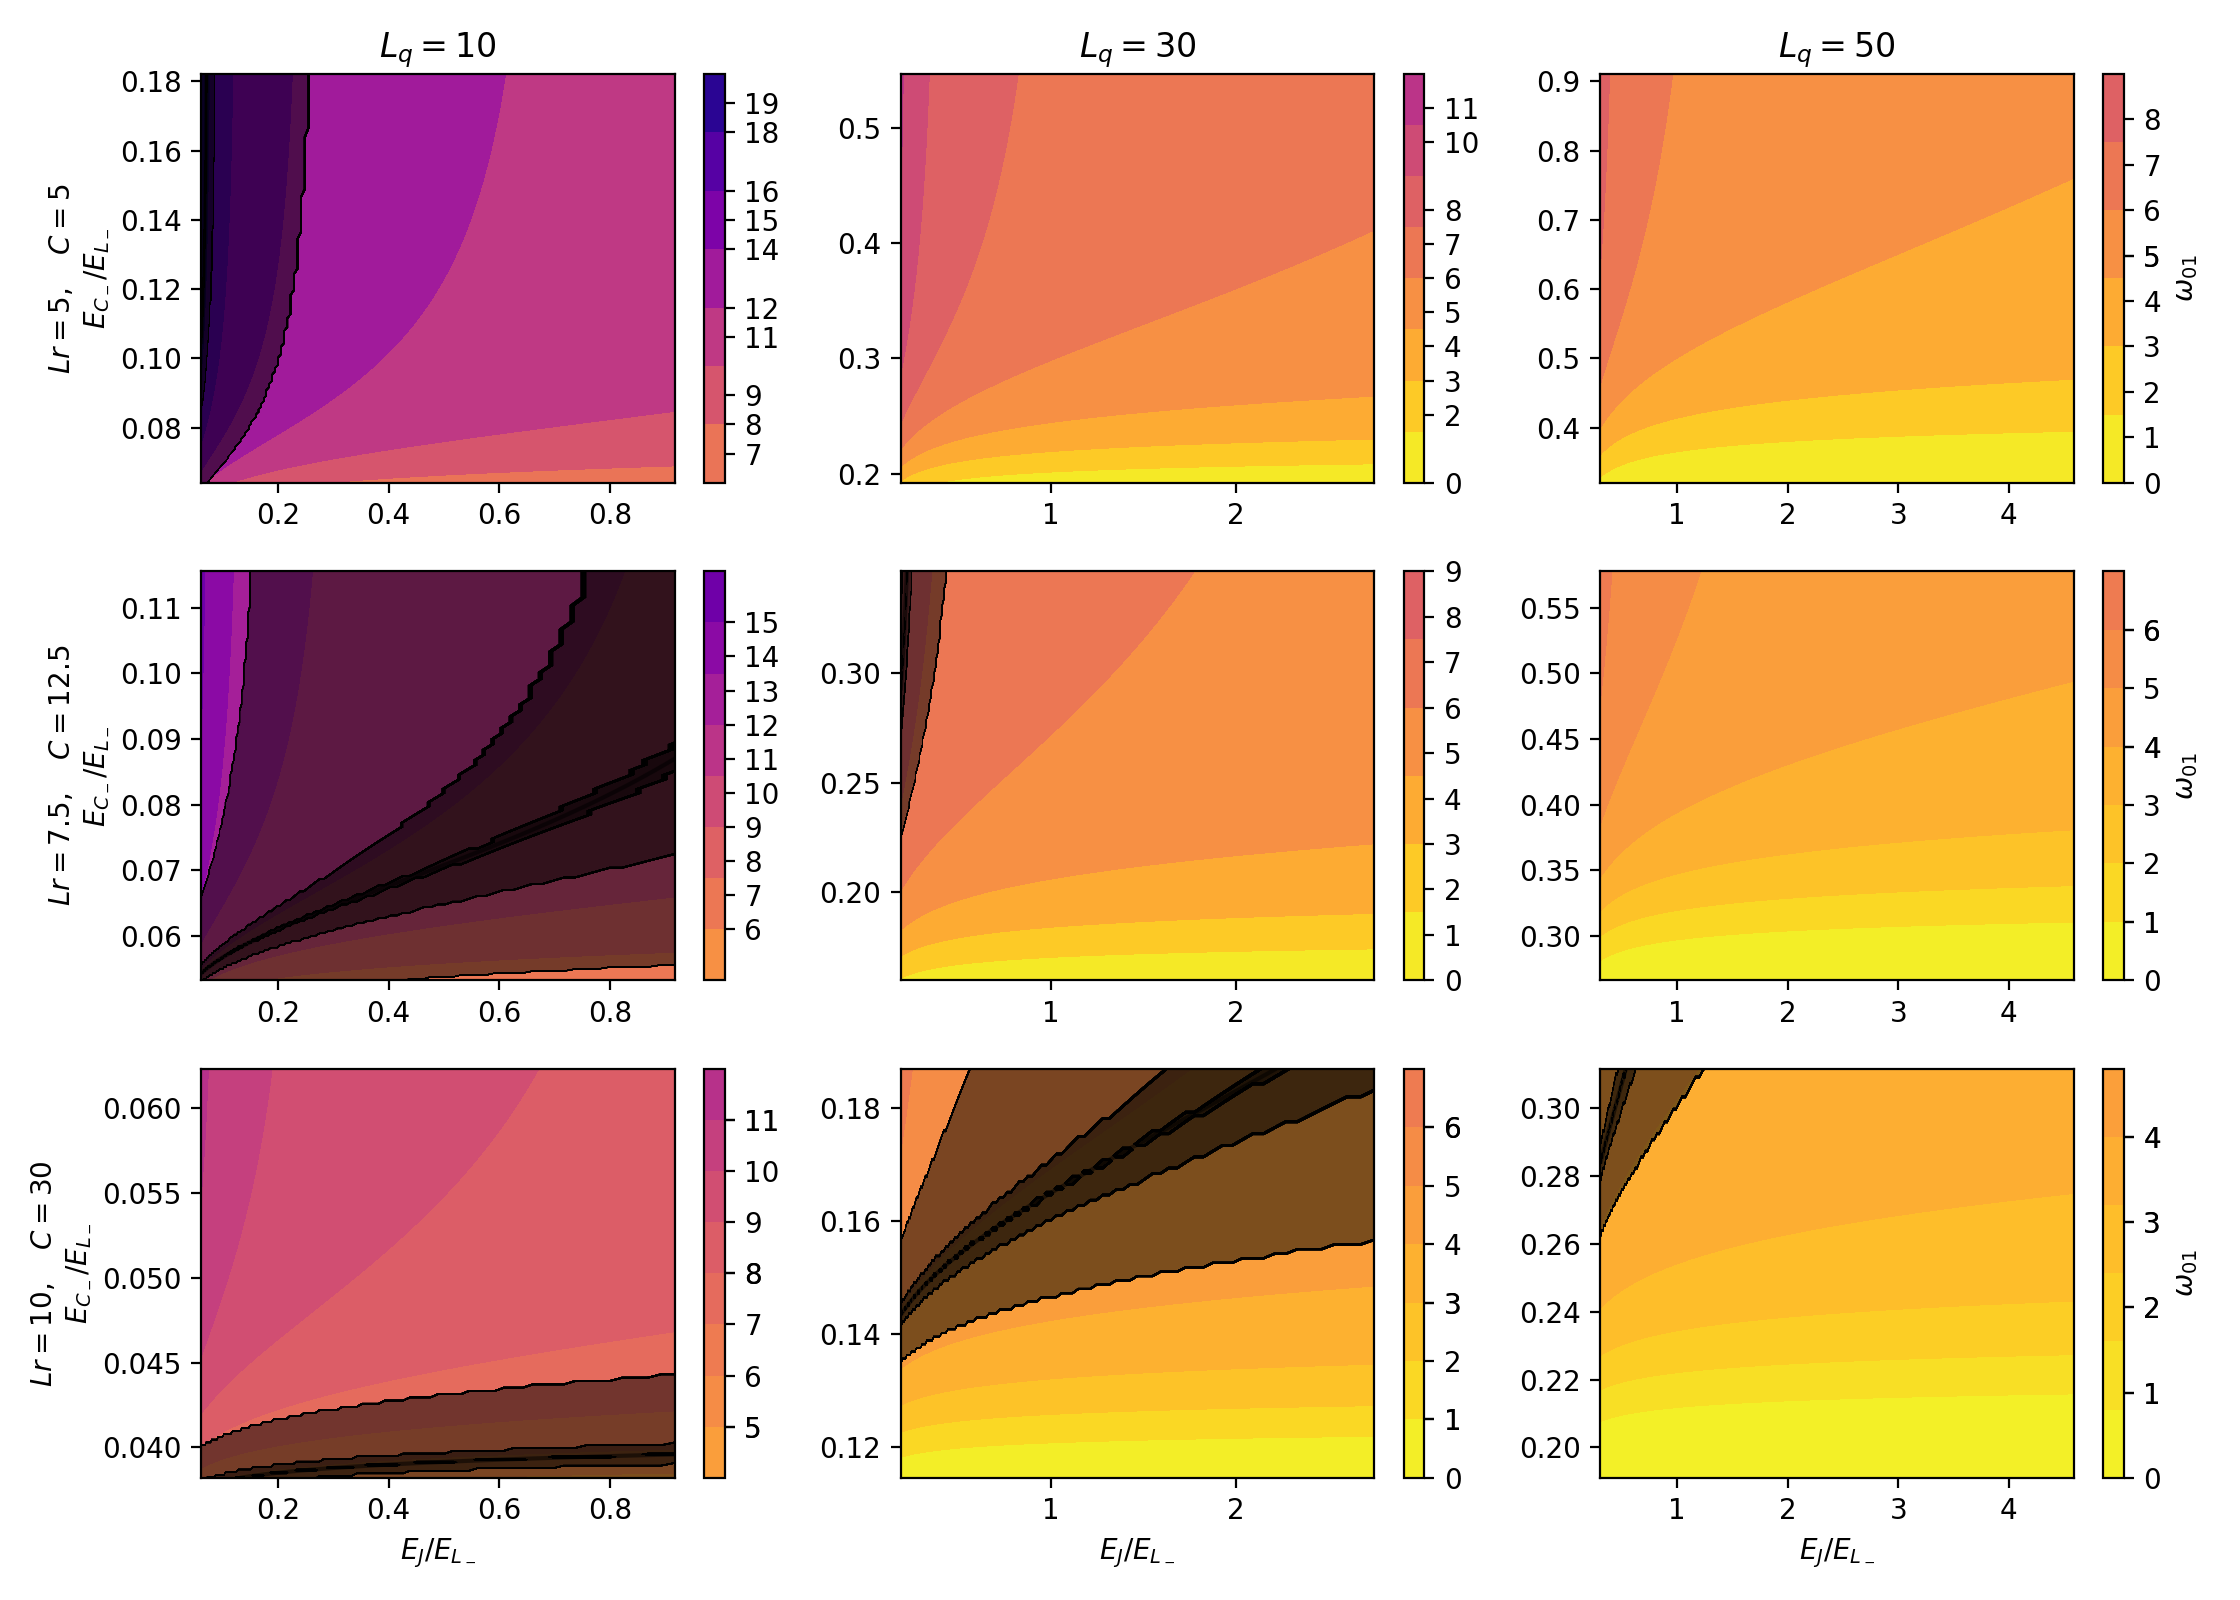

In [177]:
Δ_index = 0
linestyles_vs_Δ = [ 'dashed', 'dashdot', 'dotted' ]

from matplotlib.colors import ListedColormap, BoundaryNorm
cmap = ListedColormap([ (1, 1, 1, 0), (0,0,0,0.5)])  # (1, 1, 1, 0) is white with alpha=0
bounds = [0, 0.5, 1]
norm = BoundaryNorm(bounds, cmap.N)

fig, axs = plt.subplots(ncols=3, nrows=3, figsize = np.array([14,10])*0.8, dpi=200)
for l, (Lr, C) in enumerate(Lr_C_values):
    for i, (ax, E_L_F_eff) in enumerate(zip(axs[l,:], EL_F_values[:,l,Δ_index])):
        # ω = ω01_q_vs_params[:,:,i,l,Δ_index]
        ω = ω01_vs_params[:,:,i,l,Δ_index]
        ω_r = ω_r_vs_params[0,0,i,l,Δ_index]
        contour_plot = ax.contourf(EJ_values/E_L_F_eff, EC_F_values[:,l]/E_L_F_eff, ω, levels=6, cmap='plasma_r', vmin=0, vmax=20) 
        ax.contour(EJ_values/E_L_F_eff, EC_F_values[:,l]/E_L_F_eff, ω, levels=[ω_r], cmap=cmap, norm=norm) 

        for m in range(len(Δ_values)):
            resonance_condition =   ( np.abs(ω-ω_r) < 10 * g_vs_params[:,:,i,l, m] )
            ax.contourf(EJ_values/E_L_F_eff, EC_F_values[:,l]/E_L_F_eff, resonance_condition, levels=50, cmap=cmap, norm=norm, linestyles=linestyles_vs_Δ[m]) 
            # ax.contour(EJ_values/E_L_F_eff, EC_F_values[:,l]/E_L_F_eff, resonance_condition, levels=50, colors='k', linestyles=linestyles_vs_Δ[m]) 

        if i==2:
            cb = fig.colorbar(contour_plot, label=r'$\omega_{01}$',ticks=np.round(np.linspace(ω.min(),ω.max(),10)))
        else:
            cb = fig.colorbar(contour_plot, ticks=np.round(np.linspace(ω.min(),ω.max(),10)))
            
        if l==0:
            ax.set_title(r'$L_q=$' + f'{Lq_values[i]}'  )
        # ax.set_xscale('log')
        if l==2:
            ax.set_xlabel('$E_J/E_{L_-}$')
        if i==0:
            ax.set_ylabel(f'$Lr={Lr}, \quad C={C}$' + '\n' + '$E_{C_-}/E_{L_-}$')

fig.tight_layout()
fig.show()
# plt.close('all')
figs.export('qubit_gap_vs_parameters.pdf', fig)

In [150]:
ω_r_vs_params[0,0,:,:,0]

array([[18.377642099159, 10.065847453822, 5.811519155934],
       [14.235252766377, 8.218726834012, 4.911628644195],
       [12.030983525993, 7.117625790053, 4.331649088260]])

In [108]:
plt.close('all')

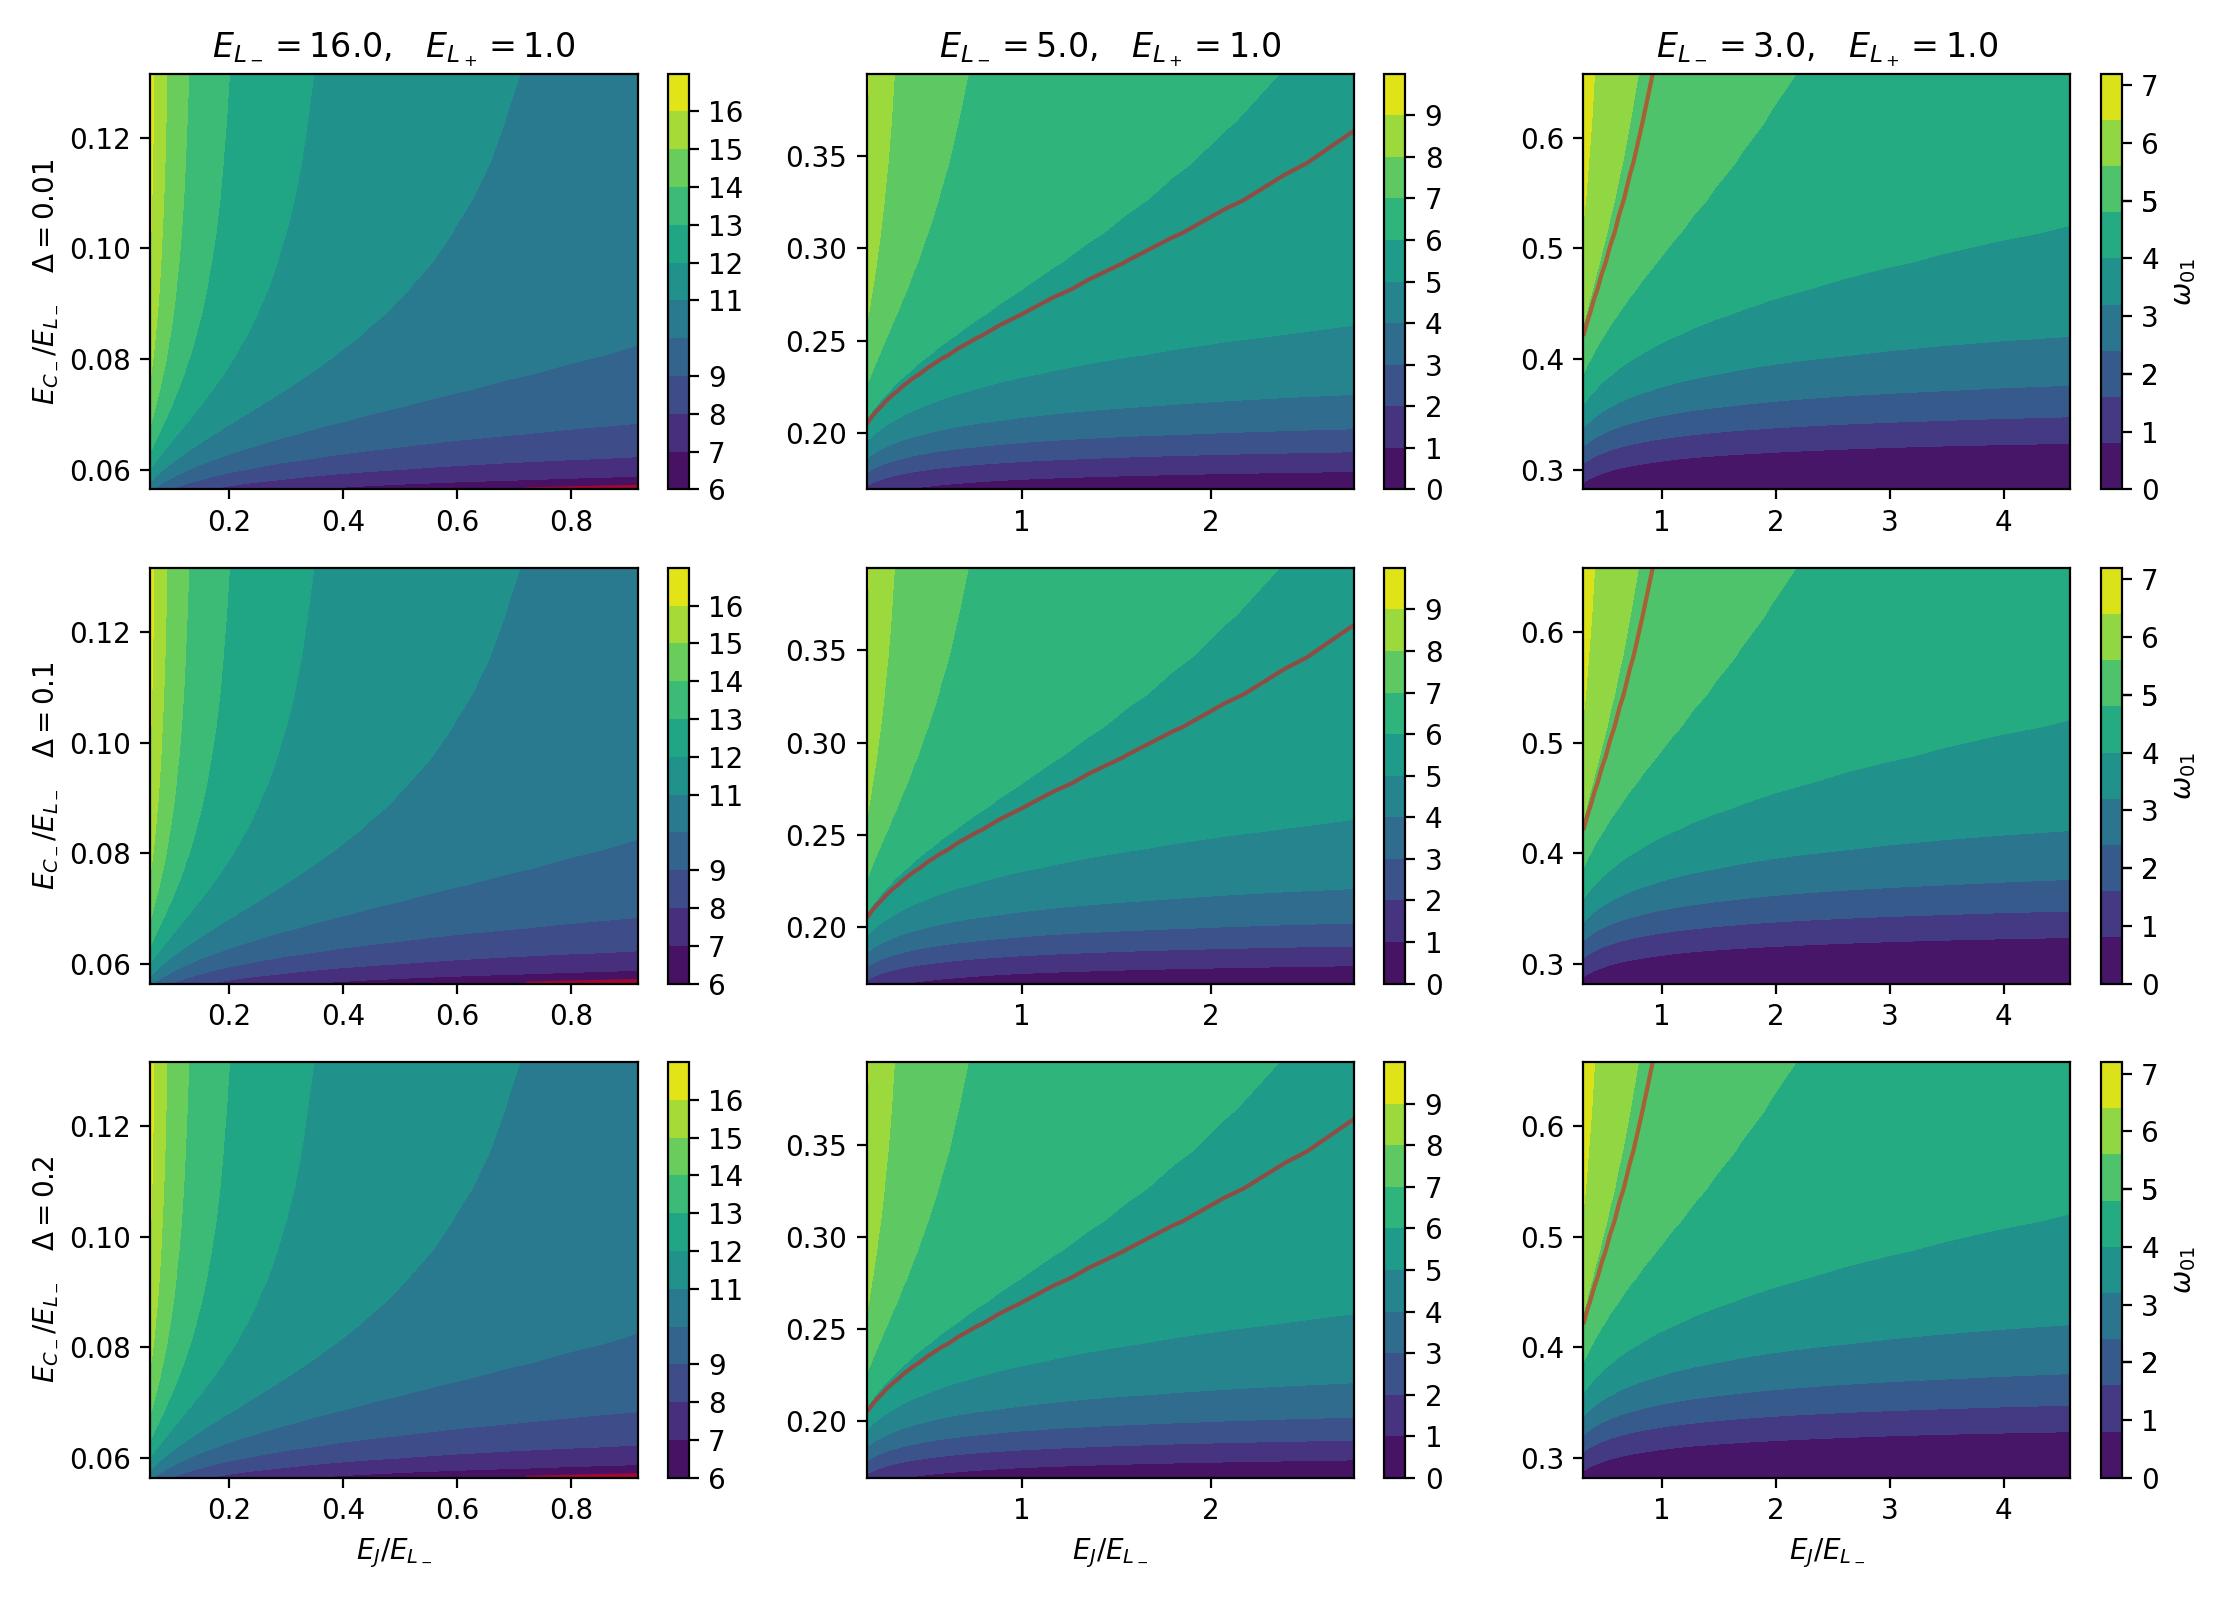

In [74]:
from matplotlib.colors import ListedColormap, BoundaryNorm
cmap = ListedColormap([ (1, 1, 1, 0), (1,0,0,0.5)])  # (1, 1, 1, 0) is white with alpha=0
bounds = [0, 0.5, 1]
norm = BoundaryNorm(bounds, cmap.N)

fig, axs = plt.subplots(ncols=3, nrows=3, figsize = np.array([14,10])*0.8, dpi=200)
for l, Δ in enumerate(Δ_values):
    for i, (ax, E_L_F_eff) in enumerate(zip(axs[l,:], EL_F_values)):
        # ω = ω01_q_vs_params[:,:,i,l]
        ω = ω01_vs_params[:,:,i,l]
        contour_plot = ax.contourf(EJ_values/E_L_F_eff, EC_values/E_L_F_eff, ω, levels=10, cmap='viridis') 
        ax.contour(EJ_values/E_L_F_eff, EC_values/E_L_F_eff, ω, levels=[ω_r_vs_params[0,0,i,l]], cmap=cmap, norm=norm) 

        
        # resonance_condition =   ( np.abs(ω-ω_r_vs_params[:,:,i,l]) <1e-1)
        # ax.contourf(EJ_values/E_L_F_eff, EC_values/E_L_F_eff, resonance_condition, levels=10, cmap=cmap, norm=norm) 

        if i==2:
            cb = fig.colorbar(contour_plot, label=r'$\omega_{01}$',ticks=np.round(np.linspace(ω.min(),ω.max(),10)))
        else:
            cb = fig.colorbar(contour_plot, ticks=np.round(np.linspace(ω.min(),ω.max(),10)))
            
        if l==0:
            ax.set_title(r'$E_{L_-}=$' + f'{np.round(E_L_F_eff)},' + r'$\quad E_{L_+}=$' + f'{np.round(EL_R_values[i])}'  )
        # ax.set_xscale('log')
        if l==2:
            ax.set_xlabel('$E_J/E_{L_-}$')
        if i==0:
            ax.set_ylabel('$E_{C_-}/E_{L_-}$'+f'$\quad \Delta={Δ}$')
        
fig.tight_layout()
fig.show()
# plt.close('all')
# figs.export('qubit_gap_vs_parameters.pdf', fig)

In [92]:
fig, axs = plt.subplots(ncols=3, figsize = [12,3])
for i, (ax, E_L_F_eff) in enumerate(zip(axs, EL_F_values)):
    contour_plot = ax.contourf(EJ_values/E_L_F_eff, EC_values/E_L_F_eff, np.log10(np.abs(ω01_q_vs_params[:,:,i]-ω01_vs_params[:,:,i])), levels=50, cmap='viridis') 
    cb = fig.colorbar(contour_plot, label=r'$\omega_{01}$')
    ax.set_title(r'$E_{L_-}=$' + f'{np.round(E_L_F_eff)},' + r'$\quad  E_{L_+}=$' + f'{np.round(EL_R_values[i])}'  )
    ax.set_xscale('log')
    ax.set_xlabel('$E_J/E_{L_-}$')
    ax.set_ylabel('$E_{C_-}/E_{L_-}$')
fig.tight_layout()
fig.show()
# plt.close('all')
# figs.export('qubit_mode_vs_Cc_alpha.pdf', fig)

TypeError: Input z must be 2D, not 3D

In [43]:
EJ_values = np.geomspace(1,15,10)
C_F_eff_values = np.linspace(6.5, 21, 10)
L_F_eff_values = np.linspace(10, 50, 10)

ω01_vs_EJ = np.zeros([len(EJ_values), len(C_F_eff_values), len(L_F_eff_values)])
ω12_vs_EJ = np.zeros([len(EJ_values), len(C_F_eff_values), len(L_F_eff_values)])
# ω01_cR_lim_vs_EJ = np.zeros(len(EJ_values))
# ω12_cR_lim_vs_EJ = np.zeros(len(EJ_values))

for i, EJ in enumerate(EJ_values):
    for j, C_F_eff in enumerate(C_F_eff_values):
        for k, L_F_eff in enumerate(L_F_eff_values):
            fluxonium = sq_ext.sq_fluxonium(EJ=EJ, C_F_eff=C_F_eff, L_F_eff=L_F_eff)  
            fluxonium.diag(3) 
            ω01_vs_EJ[i,j,k] = fluxonium.efreqs[1]-fluxonium.efreqs[0]
            ω12_vs_EJ[i,j,k] = fluxonium.efreqs[2]-fluxonium.efreqs[1]
    

In [15]:
ω01_vs_EJ.min()

1.9383797678074188e-08

In [ ]:

# Creating dataset
z = EJ_values
x = C_F_eff_values
y = L_F_eff_values
# Generate grid of points
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

c = ω01_vs_EJ
norm = plt.Normalize(c.min(), c.max())
colors = plt.cm.viridis(norm(c)) 
 # Create the plot
fig, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize=[12,3], dpi=200)
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

# Scatter plot
scatter = ax1.scatter(X, Y, Z, c=c, marker='o', alpha=0.5)
scatter = ax2.scatter(X, Y, Z, c=c, marker='o', alpha=0.5)
scatter = ax3.scatter(X, Y, Z, c=c, marker='o', alpha=0.5)

# Add a color bar which maps values to colors.
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax3, label='Value')
ax2.view_init(azim=-120, elev=-400) 
ax3.view_init(elev=10, azim=0) 
fig.tight_layout()
# Set labels and title
# ax.set_xlabel('X Axis')
# ax.set_ylabel('Y Axis')
# ax.set_zlabel('Z Axis')
# plt.title('3D Scatter Plot with Colors for Each Combination of (x, y, z)')
plt.show()

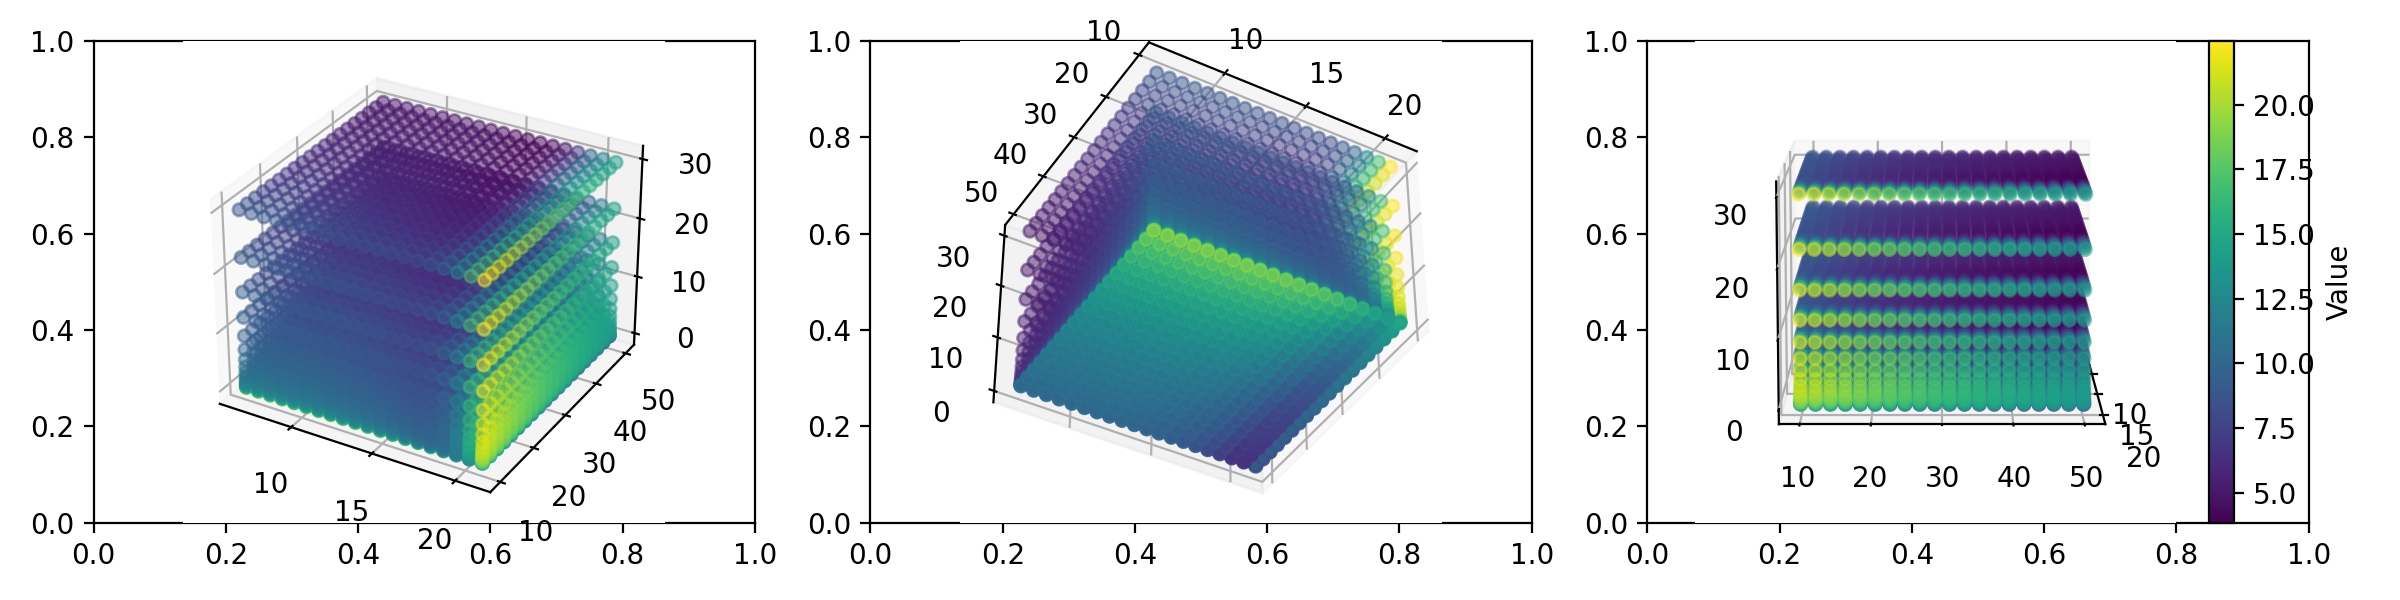

In [41]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
z = EJ_values
x = C_F_eff_values
y = L_F_eff_values
# Generate grid of points
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

c = ω12_vs_EJ
norm = plt.Normalize(c.min(), c.max())
colors = plt.cm.viridis(norm(c)) 
 # Create the plot
fig, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize=[12,3], dpi=200)
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

# Scatter plot
scatter = ax1.scatter(X, Y, Z, c=c, marker='o', alpha=0.5)
scatter = ax2.scatter(X, Y, Z, c=c, marker='o', alpha=0.5)
scatter = ax3.scatter(X, Y, Z, c=c, marker='o', alpha=0.5)

# Add a color bar which maps values to colors.
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax3, label='Value')
ax2.view_init(azim=-120, elev=-400) 
ax3.view_init(elev=10, azim=0) 
fig.tight_layout()
# Set labels and title
# ax.set_xlabel('X Axis')
# ax.set_ylabel('Y Axis')
# ax.set_zlabel('Z Axis')
# plt.title('3D Scatter Plot with Colors for Each Combination of (x, y, z)')
plt.show()

In [ ]:
H_0 = 